In [196]:
from sklearn.datasets import make_classification, make_blobs, make_biclusters,make_circles

In [126]:
X,y = make_blobs(n_features=2, n_samples=100, centers=2)

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

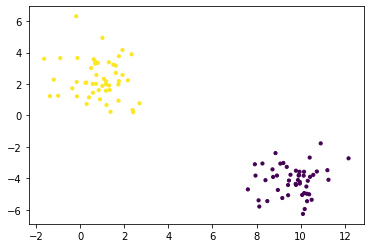

In [128]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [129]:
import numpy as np

In [130]:
#No matter what is x, it bring the number in the scale of 0-1
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [136]:
sigmoid(-0.1)

0.47502081252106

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
lr = LogisticRegression()

In [139]:
y

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [140]:
lr.fit(X,y)

LogisticRegression()

In [141]:
lr.coef_

array([[-0.99749209,  0.68548426]])

In [142]:
np.round(lr.predict_proba(X[:2]),2)

array([[0., 1.],
       [0., 1.]])

In [143]:
lr.coef_ * X[:2] + lr.intercept_

array([[7.21136561, 7.58688799],
       [6.91939648, 8.52786799]])

In [144]:

X[:1]

array([[-1.19173557,  2.28199139]])

In [145]:
y = 2.20708036 * 1.25950048 + (-0.13118643)*(-8.77339175) + lr.intercept_

In [146]:
sigmoid(y)

array([0.99995244])

In [147]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [148]:
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

c:\python37-32\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


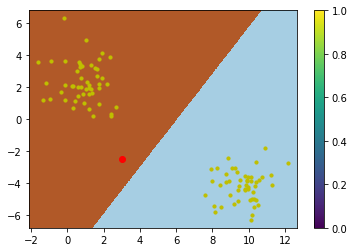

In [165]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c='y',s=10)
plt.colorbar()
plt.scatter(x=[3],y=[-2.5],c='r')

In [170]:
lr.predict([[3,-2.5]])

array([1])

In [171]:
lr.predict_proba([[3,-2.5]])

array([[0.21141254, 0.78858746]])

In [172]:
lr.predict_proba([[3,-2.5]])

array([[0.21141254, 0.78858746]])

# Predicting Employee Exit

In [173]:
import pandas as pd
hr_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [174]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [175]:
hr_data.rename(columns={'sales':'dept'}, inplace=True)

In [176]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [177]:
hr_data.shape

(14999, 10)

In [178]:
target = hr_data.left

In [179]:
hr_data = hr_data.drop(columns=['left'])

In [91]:
### Identify the cat columns

In [180]:
hr_data.select_dtypes(include=['object']).head()

,dept,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [181]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [182]:
oe = OrdinalEncoder()

In [183]:
en_hr_data = oe.fit_transform(hr_data.select_dtypes(include=['object']))

In [184]:
ss = StandardScaler()

In [185]:
ss_hr_data = ss.fit_transform(hr_data.select_dtypes(exclude=['object']))

In [186]:
complete_tf_data = np.hstack([ss_hr_data, en_hr_data])

In [187]:
complete_tf_data.shape

(14999, 9)

In [188]:
lr = LogisticRegression()

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
trainX, testX, trainY, testY = train_test_split(complete_tf_data, target)

In [191]:
lr.fit(trainX, trainY)

LogisticRegression()

In [192]:
lr.coef_.shape

(1, 9)

In [193]:
lr.score(testX,testY)

0.7661333333333333

# polynomial regression

In [226]:
X,y = make_circles(n_samples=1000, noise=.04)

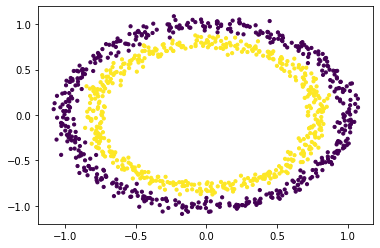

In [227]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [228]:
from sklearn.preprocessing import PolynomialFeatures

In [229]:
pol = PolynomialFeatures(degree=2)

In [230]:
pol.fit_transform([[2,3],
                   [3,4]])

array([[ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.]])

In [231]:
X_tf = pol.fit_transform(X)

In [232]:
import numpy as np

In [233]:
lr.fit(X_tf,y)

LogisticRegression()

In [239]:
np.round(lr.coef_,1)

array([[ -0. ,  -0. ,  -0.1, -10.5,   0.1, -10.5]])